In [1]:
"""
Chapter 01 - End to End machine learning project 
%config IPCompleter.greedy=True
* frame problems
* define performance measure
    - ex: RMSE 
* Load data 
    - import pandas as pd (read_csv)
    - import os
* Analyze the distribution of features 
    - import matplotlib.pyplot as plt 
    - import pandas as pd (head, describe, value_counts, hist  )
* train, test selection 
    - import numpy as np 
    - from sklearn.model_selection import train_test_split
    - from sklearn.model_selection import StratifiedShuffleSplit
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
    - import pandas as pd (corr, plot)
    - from pandas.tools.plotting import scatter_matrix
    - import matplotlib.pyplot as plt (get_cmap)
* experiment different feature combinations 
* handeling missing values
    - from sklearn.preprocessing import Imputer
* handel categorical variables - label encoding, onehot encoding
    - from sklearn.preprocessing import LabelEncoder #lab
    - from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
    - from sklearn.preprocessing import LabelBinarizer
* Writing custom feature transformation using sklearn
    - from sklearn.base import BaseEstimator, TransformerMixin
* Feature scaling - normalization(min - max)- not good with outliers , standardization(zero mean, unit variance )
    - from sklearn.preprocessing import StandardScaler 
* transformation piplines 
    - from sklearn.pipeline import Pipeline
    - from sklearn.pipeline import FeatureUnion

------ RELATED TO CHAPTER 2 ---
*training and evaluating the training set
    - from sklearn.linear_model import LinearRegression
* Find the error of training - ex: RMSE --> underfit --> complex model, more features, reduce constraints
    - from sklearn.metrics import mean_squared_error
* Better evaluation using cross validation
    - from sklearn.model_selection import cross_val_score
* Run validation on multiple models and select good models
    - from sklearn.tree import DecisionTreeRegressor
    - from sklearn.ensemble import RandomForestRegressor
* save trained models 
    - from skleran.externels import joblib
* Fine tune selected models - Grid Search , Randomized Search 
    - from sklearn.model_selection import GridSearchCV
    - from sklearn.model_selection import RandomizedSearchCV
    - from scipy.stats import randint as sp_randint
* Evaluate the system on test set
-----

* Launch, monitor and maintain the system
"""


"""
Chapter 02 - Classification 
* train-test split and random shuffeling of traning set (this is actually train and dev set)
* EDA 
* training and evaluating training set 
    - from sklearn.linear_model import SGDClassifier
* Find a proper evaluation metric to maximize/minimize during training 
* Compare multiple models 
    - Bias, variance compared to human level performance 
    - Select best few models 
    - To avoid bias - (better optimization[GD, SGB, mini batch GD, moment, adam, RMSprop], hyperparameter search[grid serach, ranamize search])
    - to avoid variance - (More data, regularization, hyperparameter search)
    - analyze PR curve, ROC curve to find better combination of precision and recall
    
* Select best 2-3 classfiers and run on test set 
    - Error Analysis 
    - If preformance is good in test set --> deploy the model 
    - If performance is not good --
         - Change the evaluation metric 
         - change dev, test sets 
* Multi class prediction 
    - OvA or OvO methods can be used
    - decision tree, random forest, naive bayes defualt support multi class classification
"""

%config IPCompleter.greedy=True
from sklearn.datasets import fetch_mldata # contains a dictionalry description, data, target

mnist = fetch_mldata('MNIST original')
#mnist



In [2]:
mnist #numpy array

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
# train test split 
X = mnist.data
y = mnist.target

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]



28.0


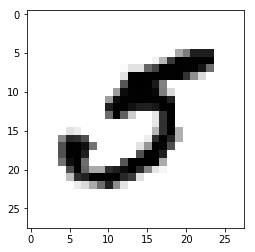

In [4]:
# eda - plot one digit 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print(np.sqrt(X_train.shape[1]))
some_number = X_train[36000]
some_number_img = some_number.reshape(28, 28)

plt.imshow(some_number_img, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()


In [5]:
# training classifiers 
shuffle_index = np.random.permutation(60000) #some learning algorithms are sensitive to the order of the samples 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(X_train.shape)
print(y_train_5.shape)




(60000, 784)
(60000,)


In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [7]:
y_predict = sgd_clf.predict(X_train)

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import random
random.seed( 30 )

# cross validation 
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="recall")
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(y_train_predict)


[False  True False ..., False False False]


In [9]:
confusion_matrix(y_train_predict, y_train_5)


array([[53502,  1167],
       [ 1077,  4254]])

In [10]:
print(precision_score( y_train_5, y_train_predict))
print(precision_score( y_train_5, y_predict))

0.797974113675
0.792119089317


In [11]:
print(recall_score(y_train_5, y_train_predict))
print(recall_score(y_train_5, y_predict))

0.784726065302
0.83434790629


In [12]:
print(f1_score( y_train_5, y_train_predict))
print(f1_score( y_train_5, y_predict)) # overfit -->

0.791294642857
0.812685293325


In [13]:
# precision/recall tradeoff 
y_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3)
print(y_scores)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)


[ 0.96045  0.96335  0.964  ]
[-160680.15562022  211054.23111801 -501953.19677961 ..., -601527.9007893
 -747550.2193083  -292032.82867452]


In [14]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)
print(precision)
print(recall)
print(thresholds)

[ 0.09073715  0.09072193  0.09072344 ...,  1.          1.          1.        ]
[  1.00000000e+00   9.99815532e-01   9.99815532e-01 ...,   3.68935621e-04
   1.84467810e-04   0.00000000e+00]
[-1723489.47687413 -1722713.9265904  -1721643.74629836 ...,
   805633.90184909   807281.47602967   858164.31244814]


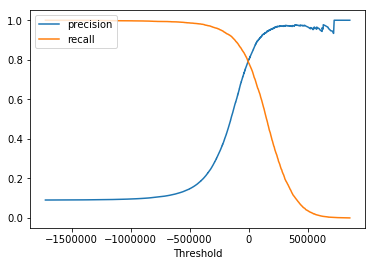

In [15]:
#PR curve uses when number of positives are less compared to data set size
def plot_pre_re_vs_thresh(pre, re, th):
    plt.plot(th, pre[:-1], label='precision')
    plt.plot(th, re[:-1], label='recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    return
plot_pre_re_vs_thresh(precision, recall, thresholds)
plt.show()

In [16]:
y_predict_90 = (y_scores > 70000)
precision_score(y_train_5, y_predict_90)

0.89140049140049138

In [17]:
f1_score(y_train_5, y_predict_90)

0.76451374986829634

In [18]:
"""
All the previous steps are optimization steps 
* Find the required threshold parameter to achieve requied performance measure
"""

'\nAll the previous steps are optimization steps \n* Find the required threshold parameter to achieve requied performance measure\n'

In [19]:
y_train_p = sgd_clf.predict(X_train)
precision_score(y_train_5, y_train_p)

0.79211908931698771

In [68]:
y_test_p = sgd_clf.predict(X_test)
precision_score(y_test_5, y_test_p)

0.80021834061135366

In [69]:
yp = sgd_clf.decision_function([X_test[0]])

In [70]:
yp > 70000


array([False], dtype=bool)

In [21]:
y_test_5[0]
from sklearn.metrics import fbeta_score, make_scorer
def custom_scoring_function(ground_truth, predictions):
    diff = np.abs(ground_truth - predictions).max()
    return np.log(1 + diff)

#my_custom_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

In [52]:
# how to analyze bias and variance from k - fold cross validation 
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=10, scoring="f1")
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train_5)
scores_t = cross_val_score(dtc, X_train, y_train_5, cv=10, scoring="f1")


In [53]:
print(scores)
print(scores_t)

[ 0.77292202  0.50416871  0.54752852  0.51744766  0.45943563  0.67109635
  0.70614693  0.70491803  0.7641196   0.78021978]
[ 0.84814815  0.86813187  0.87822878  0.85844749  0.86753731  0.84826325
  0.84587156  0.88014639  0.81776133  0.84428443]


In [54]:
print(scores.mean())
print(scores_t.mean())

0.642800321906
0.855682056097


In [55]:
print(scores.std())
print(scores_t.std())

0.116977579942
0.0178493202237


In [58]:
dtc.fit(X_train, y_train_5)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [59]:
yp_t = dtc.predict(X_test)
yp_s = sgd_clf.predict(X_test)

In [60]:
print(f1_score(y_test_5, yp_s))
print(f1_score(y_test_5, yp_t))

0.806504065041
0.862811791383


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scores_rf = cross_val_score(rfc, X_train, y_train_5, scoring="f1")

In [66]:
print(scores_rf.mean())
print(scores_rf.std())
rfc.fit(X_train, y_train_5)
yp_rf = rfc.predict(X_test)
print(f1_score(y_test_5, yp_rf))

0.90177788831
0.00345629366781
0.911392405063


In [67]:
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=10, method="decision_function")
y_scores_tree = cross_val_predict(dtc, X_train, y_train_5, cv=10,method="predict_proba")
y_scores_rf = cross_val_predict(rfc, X_train, y_train_5, cv=10,method="predict_proba")

In [87]:
pre_s, re_s, th_s = precision_recall_curve(y_train_5, y_scores_sgd)
print(y_scores_sgd.shape)
print(y_scores_tree.shape)
pre_t, re_t, th_t = precision_recall_curve(y_train_5, y_scores_tree[:,1])
pre_rf, re_rf, th_rf = precision_recall_curve(y_train_5, y_scores_rf[:,1])


(60000,)
(60000, 2)


In [88]:
plt.plot(re_s, pre_s, label="sgd")
plt.plot(re_t, pre_t, label='dec tree')
plt.plot(re_rf, pre_rf, label='rand forest')

plt.legend(loc='lower right')
plt.xlabel("recall")
plt.ylabel("pecision")

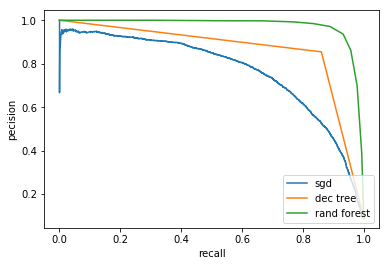

In [89]:
plt.show()

In [90]:
from sklearn.metrics import roc_curve

pre_s, re_s, th_s = roc_curve(y_train_5, y_scores_sgd)
pre_t, re_t, th_t = roc_curve(y_train_5, y_scores_tree[:,1])
pre_rf, re_rf, th_rf = roc_curve(y_train_5, y_scores_rf[:,1])


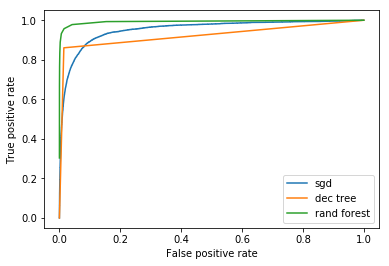

In [92]:
plt.plot(pre_s, re_s, label="sgd")
plt.plot(pre_t, re_t, label='dec tree')
plt.plot(pre_rf, re_rf, label='rand forest')

plt.legend(loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
## MULTI CLASS CLASSIFICATION
